### Probabilty Calculation for Continous Data

In [ ]:
from scipy import stats

In [ ]:
stats.norm.cdf(x = 70 , loc = 60 ,scale = 10)
#84% of students scored less than 70marks.

0.8413447460685429

In [ ]:
1 - stats.norm.cdf(x = 70 , loc = 60 ,scale = 10)

0.15865525393145707

In [ ]:
stats.norm.cdf(x = 680 , loc = 711 ,scale = 29)
#14% od students scored less than 680marks

0.14254260383881612

In [ ]:
stats.norm.cdf(x = 740 , loc = 711 ,scale = 29) - stats.norm.cdf(x = 697 , loc = 711 ,scale = 29)
#53% of the students scored between 697 and 740marks.

0.5267111786415019

## DESCRIPTIVE STATS

### Understanding the RISK and RETURNS of GLAXO and BEML

#### 1. Import Necessary libraries

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#### 2. Import Data

In [ ]:
beml_data = pd.read_csv('BEML.csv')
beml_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [ ]:
glaxo_data = pd.read_csv('GLAXO.csv')
glaxo_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


#### 3. Perform Initial Analysis

In [ ]:
beml_data.shape

(1739, 8)

In [ ]:
beml_data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
beml_data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [ ]:
glaxo_data.shape

(1739, 8)

In [ ]:
glaxo_data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
glaxo_data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

#### 4. Data Preparation

In [ ]:
beml_data_filtered = beml_data[['Date','Close']]
beml_data_filtered.head()

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05


In [ ]:
glaxo_data_filtered = glaxo_data[['Date','Close']]
glaxo_data_filtered.head()

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80


### BEML Close Price using Visuals

In [ ]:
beml_data_filtered.dtypes

Date      object
Close    float64
dtype: object

In [ ]:
beml_data_filtered['Date'] = pd.to_datetime(beml_data_filtered['Date'])

In [ ]:
beml_data_filtered.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

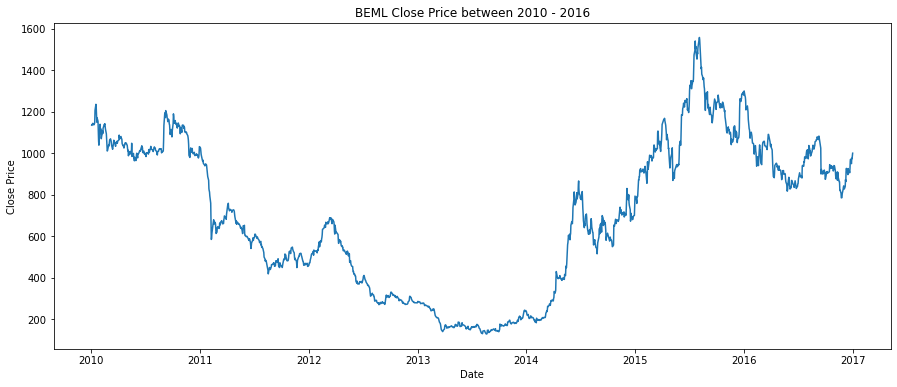

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(beml_data_filtered['Date'],beml_data_filtered['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BEML Close Price between 2010 - 2016')
plt.show()

### GLAXO Close Price using Visuals

In [ ]:
glaxo_data_filtered.dtypes

Date      object
Close    float64
dtype: object

In [ ]:
glaxo_data_filtered['Date'] = pd.to_datetime(glaxo_data_filtered['Date'])
glaxo_data_filtered.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

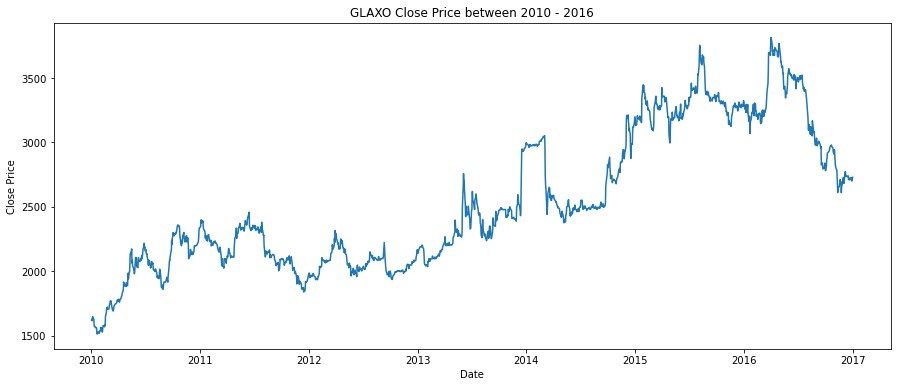

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(glaxo_data_filtered['Date'],glaxo_data_filtered['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('GLAXO Close Price between 2010 - 2016')
plt.show()

### Let's calculate the %wise Gain for each stocks

In [ ]:
beml_data_filtered['Gain'] = beml_data_filtered['Close'].pct_change(periods=1)
beml_data_filtered.head()

,Date,Close,Gain
0,2010-01-04,1135.60,NaN
1,2010-01-05,1134.60,-0.000881
2,2010-01-06,1139.60,0.004407
3,2010-01-07,1144.15,0.003993
4,2010-01-08,1144.05,-0.000087


In [ ]:
beml_data_filtered.shape

(1739, 3)

In [ ]:
beml_data_filtered.dropna(axis=0,inplace=True)

In [ ]:
beml_data_filtered.head()

,Date,Close,Gain
1,2010-01-05,1134.60,-0.000881
2,2010-01-06,1139.60,0.004407
3,2010-01-07,1144.15,0.003993
4,2010-01-08,1144.05,-0.000087
5,2010-01-11,1137.00,-0.006162


In [ ]:
beml_data_filtered.shape

(1738, 3)

In [ ]:
glaxo_data_filtered['Gain'] = glaxo_data_filtered['Close'].pct_change(periods=1)
glaxo_data_filtered.head()

,Date,Close,Gain
0,2010-01-04,1625.65,NaN
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398


In [ ]:
glaxo_data_filtered.shape

(1739, 3)

In [ ]:
glaxo_data_filtered.dropna(inplace = True)

In [ ]:
glaxo_data_filtered.head()

,Date,Close,Gain
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398
5,2010-01-11,1629.45,-0.006312


In [ ]:
glaxo_data_filtered.shape

(1738, 3)

### BEML Gain Visuals

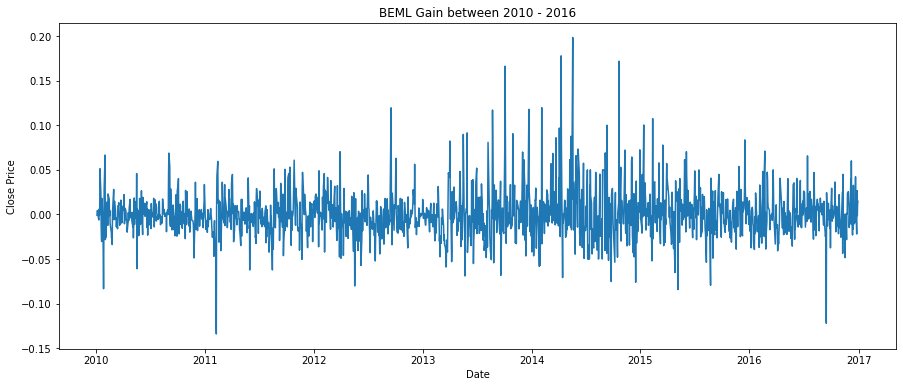

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(beml_data_filtered['Date'],beml_data_filtered['Gain'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BEML Gain between 2010 - 2016')
plt.show()

### GLAXO Gain Chart

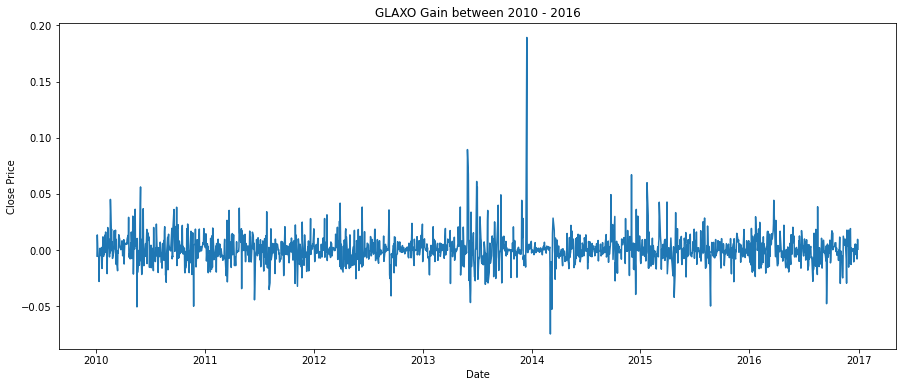

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(glaxo_data_filtered['Date'],glaxo_data_filtered['Gain'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('GLAXO Gain between 2010 - 2016')
plt.show()

## Reflection Questions

### 1. What is the probability of making 2% loss or higher in Glaxo?

In [ ]:
glaxo_data_filtered['Gain'].mean(),glaxo_data_filtered['Gain'].std()

(0.0003860410825922916, 0.013360538552253333)

In [ ]:
stats.norm.cdf(x = -0.02 , loc = 0.0004 ,scale = 0.0133)
#There is 6.25% chance that if an investor invests on Glaxo, he is more likely to lose 2% or more than 2% of his investment.

0.06253517594384148

### 2. What is the probability of making 2% loss or higher in BEML?

In [ ]:
beml_data_filtered['Gain'].mean(),beml_data_filtered['Gain'].std()

(0.00027074807905723154, 0.02643083146847487)

In [ ]:
stats.norm.cdf(x = -0.02 , loc = 0.0003 ,scale = 0.0264)
#There is 22% chance that if an investor invests on BEML, he is more likely to lose 2% or more than 2% of his investment.

0.22096464496279805

### 3. What is the probability of making 2% profit or higher in GLAXO?

In [ ]:
1 - stats.norm.cdf(x = 0.02 , loc = 0.0004 ,scale = 0.0133)
#There is 7% chance that if an investor invests on Glaxo, he is more likely to get a profit of 2% or more than 2% of his investment.

0.07028331802435683

### 4. What is the probability of making 2% profit or higher in BEML?

In [ ]:
1 - stats.norm.cdf(x = 0.02 , loc = 0.0003 ,scale = 0.0264)
#There is 22.77% chance that if an investor invests on BEML, he is more likely to get of profit of 2% or more than 2% of his investment.

0.2277696435431158

# THE END!!!